In [196]:
import pandas as pd

In [197]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [198]:
df.drop(df.columns[[0,3,8]],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [199]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [200]:
df.drop(['Cabin'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [201]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [202]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.dropna(inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [203]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [204]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [205]:
from sklearn.preprocessing import LabelEncoder

In [206]:
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

In [207]:
Y = df.Survived
df.drop(['Survived'], axis=1, inplace=True)
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [208]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [209]:
df['Sex_n'] = le_sex.fit_transform(df['Sex'])
df['Embarked_n'] = le_embarked.fit_transform(df['Embarked'])
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_n,Embarked_n
0,3,male,22.0,1,0,7.2500,S,1,2
1,1,female,38.0,1,0,71.2833,C,0,0
2,3,female,26.0,0,0,7.9250,S,0,2
3,1,female,35.0,1,0,53.1000,S,0,2
4,3,male,35.0,0,0,8.0500,S,1,2


In [210]:
df.drop(['Sex','Embarked'], axis=1, inplace=True)
df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_n,Embarked_n
0,3,22.0,1,0,7.2500,1,2
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,0,2
3,1,35.0,1,0,53.1000,0,2
4,3,35.0,0,0,8.0500,1,2


In [229]:
from sklearn.preprocessing import MinMaxScaler

In [230]:
scaler = MinMaxScaler()

In [232]:
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df))
df.head()

,0,1,2,3,4,5,6
0,1.0,0.271174,0.125,0.0,0.014151,1.0,1.0
1,0.0,0.472229,0.125,0.0,0.139136,0.0,0.0
2,1.0,0.321438,0.000,0.0,0.015469,0.0,1.0
3,0.0,0.434531,0.125,0.0,0.103644,0.0,1.0
4,1.0,0.434531,0.000,0.0,0.015713,1.0,1.0


In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, test_size=0.2)

In [235]:
X_train.head()

,0,1,2,3,4,5,6
22,1.0,0.183212,0.000,0.000000,0.015672,0.0,0.5
366,1.0,0.367921,0.000,0.000000,0.014110,0.0,0.0
783,1.0,0.308872,0.000,0.000000,0.013761,1.0,1.0
621,1.0,0.246042,0.125,0.166667,0.030726,1.0,0.0
135,0.0,0.233476,0.000,0.333333,0.051302,0.0,1.0


In [236]:
Y_train.head()

22     1
367    1
784    0
622    1
136    1
Name: Survived, dtype: int64

In [237]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [238]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [239]:
model.score(X_test, Y_test)

0.8146067415730337

In [240]:
Y_predicted = model.predict(X_test)

In [241]:
from sklearn.metrics import confusion_matrix

In [242]:
cm = confusion_matrix(Y_predicted, Y_test)
cm

array([[91, 19],
       [14, 54]], dtype=int64)

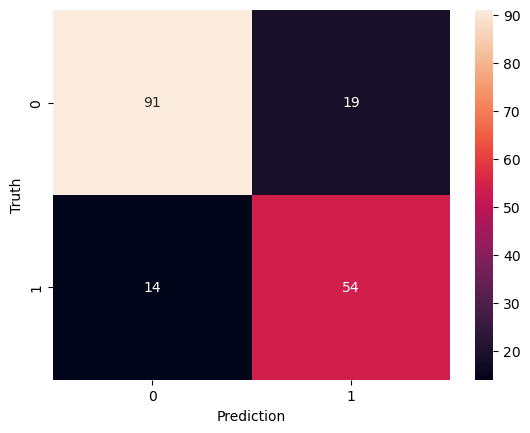

In [243]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show()